# Initialization, overal p-values calculation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("tasksSolvedListwithoutMissingParticipants.txt", header=0)
data.head()

,task,team,user,correctItem_any
0,KIS Textual 1,siret,siret I,True
1,KIS Textual 11,siret,siret I,True
2,KIS Textual 12,siret,siret I,False
3,KIS Textual 13,siret,siret I,True
4,KIS Textual 15,siret,siret I,False


In [3]:
siret_data = data.loc[data.team == "siret"]
vitrivr_data = data.loc[data.team == "vitrivr"]
siret_users = siret_data.user.unique()
vitrivr_users = vitrivr_data.user.unique()
tasks = data.task.unique()

In [4]:
(siret_data.correctItem_any.sum(),siret_data.correctItem_any.count(),vitrivr_data.correctItem_any.sum(),vitrivr_data.correctItem_any.count())

(190, 282, 170, 336)

In [5]:
from scipy.stats import fisher_exact
contingency_table = [
    [siret_data.correctItem_any.sum(),
    (siret_data.correctItem_any.count()-siret_data.correctItem_any.sum())],
    [vitrivr_data.correctItem_any.sum(),
    (vitrivr_data.correctItem_any.count()-vitrivr_data.correctItem_any.sum())]]
oddsvalue, pvalue = fisher_exact(contingency_table)
pvalue

2.86900963339376e-05

In [6]:
siret_dataText = data.loc[(data.team == "siret") & (data.task.str.contains("Textual"))]
vitrivr_dataText = data.loc[(data.team == "vitrivr") & (data.task.str.contains("Textual"))]
siret_usersText = siret_dataText.user.unique()
vitrivr_usersText = vitrivr_dataText.user.unique()
tasksText = siret_dataText.task.unique()
siret_dataText.shape

(141, 4)

In [7]:
contingency_table = [
    [siret_dataText.correctItem_any.sum(),
    (siret_dataText.correctItem_any.count()-siret_dataText.correctItem_any.sum())],
    [vitrivr_dataText.correctItem_any.sum(),
    (vitrivr_dataText.correctItem_any.count()-vitrivr_dataText.correctItem_any.sum())]]
oddsvalue, pvalue = fisher_exact(contingency_table)
pvalue

0.0158812941927436

In [8]:
(siret_dataText.correctItem_any.sum(),siret_dataText.correctItem_any.count(),vitrivr_dataText.correctItem_any.sum(),vitrivr_dataText.correctItem_any.count())

(88, 141, 81, 168)

In [9]:
siret_dataVisual = data.loc[(data.team == "siret") & (data.task.str.contains("Visual"))]
vitrivr_dataVisual = data.loc[(data.team == "vitrivr") & (data.task.str.contains("Visual"))]
siret_usersVisual = siret_dataVisual.user.unique()
vitrivr_usersVisual= vitrivr_dataVisual.user.unique()
tasksVisual = siret_dataVisual.task.unique()
siret_dataVisual.shape

(141, 4)

In [10]:
contingency_table = [
    [siret_dataVisual.correctItem_any.sum(),
    (siret_dataVisual.correctItem_any.count()-siret_dataVisual.correctItem_any.sum())],
    [vitrivr_dataVisual.correctItem_any.sum(),
    (vitrivr_dataVisual.correctItem_any.count()-vitrivr_dataVisual.correctItem_any.sum())]]
oddsvalue, pvalue = fisher_exact(contingency_table)
pvalue

0.0006266979010396024

In [11]:
(siret_dataVisual.correctItem_any.sum(),siret_dataVisual.correctItem_any.count(),vitrivr_dataVisual.correctItem_any.sum(),vitrivr_dataVisual.correctItem_any.count())

(102, 141, 89, 168)

In [12]:
siret_data.set_index([siret_data.user,siret_data.task], inplace=True)
index = pd.MultiIndex.from_product([siret_users, tasks], names = ["user", "task"])
siret_data = siret_data.reindex(index)
vitrivr_data.set_index([vitrivr_data.user,vitrivr_data.task], inplace=True)
index = pd.MultiIndex.from_product([vitrivr_users, tasks], names = ["user", "task"])
vitrivr_data = vitrivr_data.reindex(index)

# Some bootstraping statistics for the size of the original test 
## (7 users, 42 tasks)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def run_statistics(siret_data, vitrivr_data):
    contingency_table = [
        [siret_data.sum(),
        (siret_data.count()-siret_data.sum())],
        [vitrivr_data.sum(),
        (vitrivr_data.count()-vitrivr_data.sum())]]
    oddsvalue, pvalue = fisher_exact(contingency_table)
    return pvalue

In [11]:
np.random.seed(42)
#sampling the finding probability
hits = []
pvals = []
for usersRepIndex in range(20):
            for tasksRepIndex in range(100):
                boot_siret_users = np.random.choice(siret_users,7)
                boot_vitrivr_users = np.random.choice(vitrivr_users,7)
                boot_tasks = np.random.choice(tasks,42)
                
                siret_labels = pd.MultiIndex.from_product([boot_siret_users, boot_tasks], names = ["user", "task"])
                vitrivr_labels = pd.MultiIndex.from_product([boot_vitrivr_users, boot_tasks], names = ["user", "task"])
                boot_siret_data = siret_data.loc[siret_labels]
                boot_vitrivr_data = vitrivr_data.loc[vitrivr_labels]                
                siret_truevals = boot_siret_data.correctItem_any.dropna()
                vitrivr_truevals = boot_vitrivr_data.correctItem_any.dropna()
                
                if siret_truevals.count() > 0:
                    sirScore = siret_truevals.sum()/siret_truevals.count()
                else:
                    sirScore = 0
                
                if vitrivr_truevals.count() > 0:
                    vitScore = vitrivr_truevals.sum()/vitrivr_truevals.count()
                else:
                    vitScore = 0
                hits.append(sirScore-vitScore)
                pvals.append(run_statistics(siret_truevals, vitrivr_truevals))

(array([ 26., 109., 243., 461., 543., 395., 168.,  47.,   6.,   2.]),
 array([-0.05231783, -0.00098227,  0.0503533 ,  0.10168887,  0.15302444,
         0.20436001,  0.25569557,  0.30703114,  0.35836671,  0.40970228,
         0.46103784]),
 <a list of 10 Patch objects>)

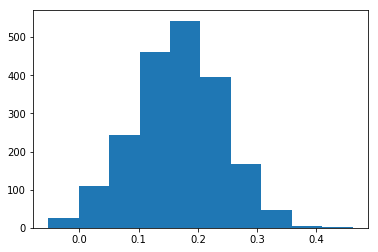

In [15]:
plt.hist(hits)

(array([1733.,   69.,   33.,   24.,   13.,   18.,   19.,    9.,   16.,
           6.,    8.,    3.,    4.,    6.,   10.,    2.,    0.,    9.,
           8.,   10.]),
 array([4.95627211e-31, 5.00000000e-02, 1.00000000e-01, 1.50000000e-01,
        2.00000000e-01, 2.50000000e-01, 3.00000000e-01, 3.50000000e-01,
        4.00000000e-01, 4.50000000e-01, 5.00000000e-01, 5.50000000e-01,
        6.00000000e-01, 6.50000000e-01, 7.00000000e-01, 7.50000000e-01,
        8.00000000e-01, 8.50000000e-01, 9.00000000e-01, 9.50000000e-01,
        1.00000000e+00]),
 <a list of 20 Patch objects>)

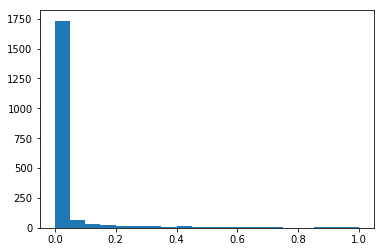

In [16]:
plt.hist(pvals, bins=20)
#distribution is highly skewed, perhaps mean p-value is not such a good idea - use median instead?
#other than this, the p-value histogram looks as expected

In [17]:
#median and mean of the bootstrap
(pvals[round(len(pvals)/2)], np.mean(pvals))


(8.96544327739141e-06, 0.04577123776644153)

In [18]:
#what was the actual difference in finding probability between siret and virivr?
siret_truevals = siret_data.correctItem_any.dropna()
vitrivr_truevals = vitrivr_data.correctItem_any.dropna()
if siret_truevals.count() > 0:
                    sirScore = siret_truevals.sum()/siret_truevals.count()
else:
                    sirScore = 0
if vitrivr_truevals.count() > 0:
                    vitScore = vitrivr_truevals.sum()/vitrivr_truevals.count()
else:
                    vitScore = 0
(sirScore-vitScore)

0.167806484295846

In [19]:
# what was the actual p-value?
contingency_table = [
    [siret_data.correctItem_any.sum(),
    (siret_data.correctItem_any.count()-siret_data.correctItem_any.sum())],
    [vitrivr_data.correctItem_any.sum(),
    (vitrivr_data.correctItem_any.count()-vitrivr_data.correctItem_any.sum())]]
oddsvalue, pvalue = fisher_exact(contingency_table)
pvalue

2.86900963339376e-05

In [119]:
# seems like the bootstraping approximation does its job if considering the whole test...

# 2D Bootstrap statistics:
bootstraping users (20x), bootstraping tasks (100x), crossjoin => 2000 bootstrap runs
- various sizes of both bootstraped lists (1-7 for users, 1-42 for tasks)

four statistics calculated: 
- fraction of bootstraps, where siret scored higher than vitrivr (mean probability to find item to compensate for missing data)
- p-values (Fisher exact score) of above and for the list of p-values, mean, median and ratio of p_val < 0.05 is calculated


# P-values for Fisher exact test (binary values)

In [13]:
def getScores(siret_truevals, vitrivr_truevals):
                if siret_truevals.count() > 0:
                    sirScore = siret_truevals.sum()/siret_truevals.count()
                else:
                    sirScore = 0
                
                if vitrivr_truevals.count() > 0:
                    vitScore = vitrivr_truevals.sum()/vitrivr_truevals.count()
                else:
                    vitScore = 0
                    
            
                return sirScore, vitScore

In [111]:
maxUsers = 8
maxTasks = 43
np.random.seed(42)
resultsMed = np.zeros((maxUsers,maxTasks))
resultsMean = np.zeros((maxUsers,maxTasks))
confirmed = np.zeros((maxUsers,maxTasks))
larger = np.zeros((maxUsers,maxTasks))
f  = open("results.csv","w") 
f2  = open("hitProbabilities.csv","w") 
for numUsers in range(1,maxUsers):
    for numTasks in range(1,maxTasks):
        pvals = []
        hits = []
        gt = 0
        for usersRepIndex in range(20):
            for tasksRepIndex in range(100):
                boot_siret_users = np.random.choice(siret_users,numUsers)
                boot_vitrivr_users = np.random.choice(vitrivr_users,numUsers)
                boot_tasks = np.random.choice(tasks,numTasks)
                
                siret_labels = pd.MultiIndex.from_product([boot_siret_users, boot_tasks], names = ["user", "task"])
                vitrivr_labels = pd.MultiIndex.from_product([boot_vitrivr_users, boot_tasks], names = ["user", "task"])
                boot_siret_data = siret_data.loc[siret_labels]
                boot_vitrivr_data = vitrivr_data.loc[vitrivr_labels]                
                siret_truevals = boot_siret_data.correctItem_any.dropna()
                vitrivr_truevals = boot_vitrivr_data.correctItem_any.dropna()
                
                pvals.append(run_statistics(siret_truevals, vitrivr_truevals))
                (sirScore,vitScore) = getScores(siret_truevals, vitrivr_truevals)
                if sirScore>vitScore:
                    gt = gt + 1
                hits.append((sirScore,vitScore))
                
        mean = np.mean(pvals)
        median = np.median(pvals)
        pvalsS = [str(i) for i in pvals]
        f.write(';'.join(pvalsS)+"\n")
        hitsS = [str(i) for i in hits]
        f2.write(';'.join(hitsS)+"\n")
        
        
        pvalsA = np.array(pvals)
        conf = (pvalsA<0.05).sum()  / 2000      
        print(median, mean, conf, gt)
        resultsMed[numUsers,numTasks] = median
        resultsMean[numUsers,numTasks] = mean
        confirmed[numUsers,numTasks] = conf
        
        larger[numUsers,numTasks] = gt/2000

1.0 1.0 0.0 560
1.0 0.928 0.0 848
1.0 0.8521 0.0 993
1.0 0.7849190476190476 0.011 1121
1.0 0.7654583333333332 0.03 1251
1.0 0.7258795454545454 0.0095 1290
0.5920745920745929 0.6775332070707073 0.025 1333
0.619269619269618 0.6655243756243756 0.0415 1389
0.6371863430686977 0.6420544154375041 0.052 1377
0.64991664682067 0.616101410865536 0.041 1412
0.6594427244582028 0.5947410618363405 0.0525 1501
0.6404053612291601 0.5767535240828181 0.0635 1501
0.6077448523268952 0.5570312316293619 0.093 1525
0.4494817606676544 0.5373758175974724 0.0735 1542
0.4621373523764432 0.5244454786352656 0.0775 1577
0.4725475971691574 0.512996973939486 0.0825 1575
0.46486080914591643 0.4922019405810318 0.1065 1614
0.47052280311457273 0.4741019015296198 0.1425 1604
0.47563358686829127 0.4796856727362275 0.133 1613
0.34064371475988164 0.4554857513150107 0.134 1643
0.3498866999613083 0.4454577686581253 0.146 1668
0.347474958890429 0.4211618216297095 0.154 1688
0.352302480184409 0.41233120711303434 0.1805 1686
0.358

0.0028155794232806804 0.07725077768896367 0.7545 1954
0.523809523809524 0.606826388888889 0.178 1061
0.3698499642772083 0.48497136841486677 0.1925 1295
0.3295019157088124 0.42833588271378636 0.218 1421
0.3008447824910553 0.38909766316785693 0.2585 1487
0.24363423156582734 0.3537478021571827 0.2845 1565
0.1953562245515577 0.34158532208206305 0.2895 1581
0.17063404475908156 0.3149354212793424 0.3145 1642
0.16237840861823385 0.3035125842581382 0.3595 1659
0.11934245800394297 0.2661234500475692 0.3845 1713
0.10031198954441581 0.2619991238960638 0.4195 1739
0.08096291686911543 0.2403177257864895 0.437 1769
0.0627754181999012 0.22417846483444254 0.463 1779
0.06805257322916627 0.21867951745438224 0.462 1800
0.044631966925818875 0.1945885599151817 0.5065 1799
0.046148375135111594 0.19628148794943617 0.5175 1830
0.03903619555757752 0.19008473998896833 0.5215 1840
0.02977851454132933 0.17745212123276027 0.557 1843
0.023622950585954042 0.16339242499149928 0.5775 1858
0.025537874612425345 0.163648

In [112]:
np.savetxt("resultsMed.csv",resultsMed, delimiter=";", fmt="%.5f")
np.savetxt("resultsMean.csv",resultsMean, delimiter=";", fmt="%.5f")
np.savetxt("larger.csv",larger, delimiter=";", fmt="%.5f")
np.savetxt("confirmed.csv",confirmed, delimiter=";", fmt="%.5f")

In [14]:
resultsMedLd = np.genfromtxt("resultsMed.csv", delimiter=";")
resultsMeanLd = np.genfromtxt("resultsMean.csv", delimiter=";")
largerLd = np.genfromtxt("larger.csv", delimiter=";")
confirmedLd = np.genfromtxt("confirmed.csv", delimiter=";")

largerLd = largerLd * 100
confirmedLd = confirmedLd * 100

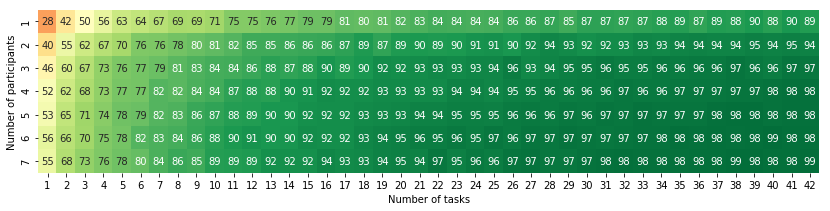

In [17]:
f, ax = plt.subplots(figsize=(14, 3))
ax = sns.heatmap(largerLd[1:,1:], cmap="RdYlGn", vmin=0, vmax=100, fmt=".0f", annot=True, 
                 cbar=False, xticklabels=range(1,43),yticklabels=range(1,8), ax=ax)
ax.set(xlabel='Number of tasks', ylabel='Number of participants')
plt.savefig("greaterThanComparison.png",dpi=300, bbox_inches='tight')

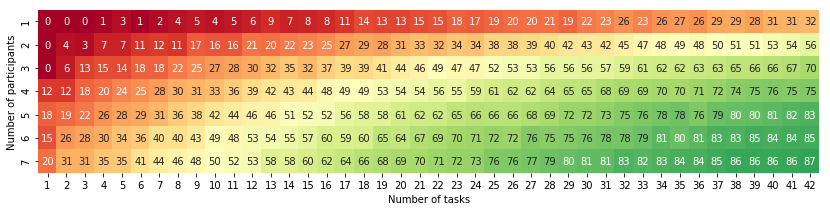

In [18]:
f, ax = plt.subplots(figsize=(14, 3))
sns.heatmap(confirmedLd[1:,1:], cmap="RdYlGn", vmin=0, vmax=100, fmt=".0f", annot=True, 
            cbar=False,xticklabels=range(1,43),yticklabels=range(1,8), ax=ax)
ax.set(xlabel='Number of tasks', ylabel='Number of participants')
plt.savefig("statSignificanceComparison.png",dpi=300, bbox_inches='tight')

### Visualize added value per user, per task

In [25]:
res_per_users = []
for i in range(1,8):
    res_per_users.append( pd.Series(largerLd[i,1:], (np.array(range(largerLd[1,1:].shape[0]))+1)*i))
#res_per_users

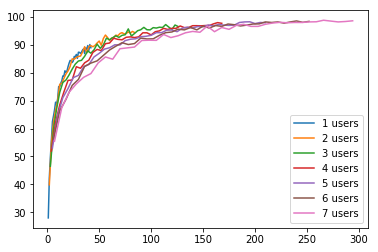

In [28]:
i = 0
for res in res_per_users:
    i = i+1
    res.plot(label = str(i)+" users")
plt.legend()
# a bit surprisingly, but more users provides slightly less added values than more tasks in term of direct results comparison
# the difference is not great, but noteworthy

In [29]:
res_per_users = []
for i in range(1,8):
    res_per_users.append( pd.Series(confirmedLd[i,1:], (np.array(range(confirmedLd[1,1:].shape[0]))+1)*i))
#res_per_users

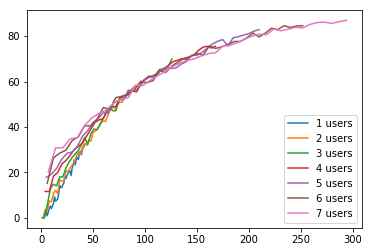

In [30]:
i = 0
for res in res_per_users:
    i = i+1
    res.plot(label = str(i)+" users")
plt.legend()
# the situation is however opposite for the (head section) of significance comparison - more users => more significant results
# nonetheless, it converge to roughly the same values from around 75 men-tasks

### other features

[Text(159.0, 0.5, 'Number of participants'), Text(0.5, 6.0, 'Number of tasks')]

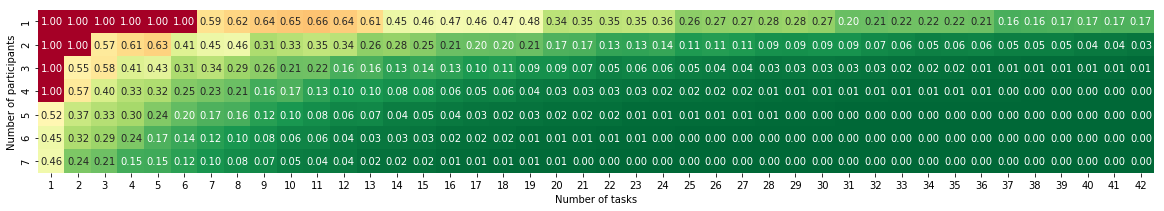

In [116]:
f, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(resultsMedLd[1:,1:], cmap="RdYlGn_r", vmin=0, vmax=1, fmt=".2f", annot=True, cbar=False, ax=ax,
           xticklabels=range(1,43),yticklabels=range(1,8))
ax.set(xlabel='Number of tasks', ylabel='Number of participants')

[Text(159.0, 0.5, 'Number of participants'), Text(0.5, 6.0, 'Number of tasks')]

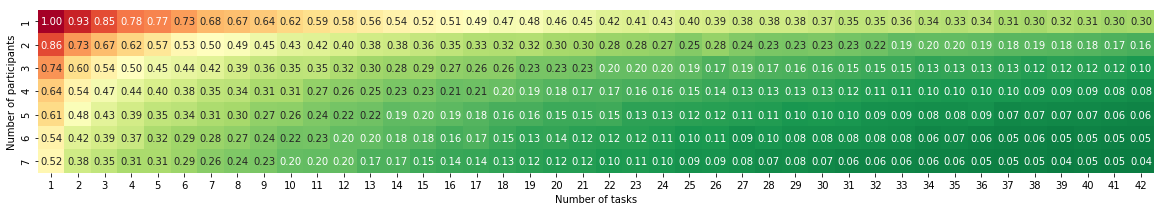

In [117]:
f, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(resultsMeanLd[1:,1:], cmap="RdYlGn_r", vmin=0, vmax=1, fmt=".2f", annot=True, cbar=False, ax=ax,
           xticklabels=range(1,43),yticklabels=range(1,8))
ax.set(xlabel='Number of tasks', ylabel='Number of participants')

# Bayesian factor

In [21]:
from scipy.special import comb

In [48]:
#single cell
np.random.seed(42)
#sampling the finding probability
gt=0
for usersRepIndex in range(10):
                for tasksRepIndex in range(50):
                    boot_siret_users = np.random.choice(siret_users,2)
                    boot_vitrivr_users = np.random.choice(vitrivr_users,2)
                    boot_tasks = np.random.choice(tasks,20)

                    siret_labels = pd.MultiIndex.from_product([boot_siret_users, boot_tasks], names = ["user", "task"])
                    vitrivr_labels = pd.MultiIndex.from_product([boot_vitrivr_users, boot_tasks], names = ["user", "task"])
                    boot_siret_data = siret_data.loc[siret_labels]
                    boot_vitrivr_data = vitrivr_data.loc[vitrivr_labels]                
                    siret_truevals = boot_siret_data.correctItem_any.dropna()
                    vitrivr_truevals = boot_vitrivr_data.correctItem_any.dropna()

                    if siret_truevals.count() > 0:
                        sirScore = siret_truevals.sum()/siret_truevals.count()
                    else:
                        sirScore = 0

                    if vitrivr_truevals.count() > 0:
                        vitScore = vitrivr_truevals.sum()/vitrivr_truevals.count()
                    else:
                        vitScore = 0
                    if sirScore>vitScore:
                        gt = gt + 1


tot = 500
variants = comb(tot, gt) #this is a constant, candidate for removal?
#p_good = np.linspace(0.95, 1.0, 50)
#p_bad = np.linspace(0, 0.95, 950)

p_good = np.linspace(0.9, 1.0, 100)
p_bad = np.linspace(0, 0.9, 900)

#nom = np.sum(variants*p_good**gt*(1-p_good)**(tot-gt)) 
#den = np.sum(variants*p_bad**gt*(1-p_bad)**(tot-gt))

nom = np.sum(1*p_good**gt*(1-p_good)**(tot-gt)) 
den = np.sum(1*p_bad**gt*(1-p_bad)**(tot-gt))
nom/den



0.21184414080516717

In [53]:
maxUsers = 8
maxTasks = 43
np.random.seed(42)
bayesFactor = np.zeros((maxUsers,maxTasks))

for numUsers in range(1,maxUsers):
    for numTasks in range(1,maxTasks):
        gt = 0
        tot = 500
        for usersRepIndex in range(10):
            for tasksRepIndex in range(50):
                boot_siret_users = np.random.choice(siret_users,numUsers)
                boot_vitrivr_users = np.random.choice(vitrivr_users,numUsers)
                boot_tasks = np.random.choice(tasks,numTasks)
                
                siret_labels = pd.MultiIndex.from_product([boot_siret_users, boot_tasks], names = ["user", "task"])
                vitrivr_labels = pd.MultiIndex.from_product([boot_vitrivr_users, boot_tasks], names = ["user", "task"])
                boot_siret_data = siret_data.loc[siret_labels]
                boot_vitrivr_data = vitrivr_data.loc[vitrivr_labels]                
                siret_truevals = boot_siret_data.correctItem_any.dropna()
                vitrivr_truevals = boot_vitrivr_data.correctItem_any.dropna()
                
                (sirScore,vitScore) = getScores(siret_truevals, vitrivr_truevals)
                if sirScore>vitScore:
                    gt = gt + 1
                
                
        #variants = comb(tot, gt) #this is a constant, candidate for removal?
        #p_good = np.linspace(0.95, 1.0, 50)
        #p_bad = np.linspace(0, 0.95, 950)
        p_good = np.linspace(0.9, 1.0, 100)
        p_bad = np.linspace(0, 0.9, 900)

        #nom = np.sum(variants*p_good**gt*(1-p_good)**(tot-gt)) 
        #den = np.sum(variants*p_bad**gt*(1-p_bad)**(tot-gt))

        nom = np.sum(1*p_good**gt*(1-p_good)**(tot-gt)) 
        den = np.sum(1*p_bad**gt*(1-p_bad)**(tot-gt))
        val =    nom/den
        
        print(numUsers, numTasks, val)
        
        bayesFactor[numUsers,numTasks] = val
np.savetxt("bayesFactor.csv",bayesFactor, delimiter=";", fmt="%.10f")


1 1 0.0
1 2 1.402981975377463e-166
1 3 1.4569024120125418e-90
1 4 3.1626040306319987e-81
1 5 2.383485817461645e-65
1 6 1.0813077969770968e-53
1 7 3.026847131236247e-50
1 8 3.1561063318512175e-36
1 9 3.4053774243287245e-23
1 10 8.594880653520628e-28
1 11 1.231909623630262e-35
1 12 4.512654774864561e-18
1 13 3.347625462531364e-17
1 14 9.649089289521038e-22
1 15 8.967438332212462e-17
1 16 2.8900984234690737e-10
1 17 9.128704298014478e-13
1 18 5.024811753492782e-12
1 19 1.2181422709476911e-08
1 20 2.4682703089141485e-06
1 21 3.7210270144831385e-07
1 22 7.491935849680136e-05
1 23 0.028835807741106657
1 24 0.16415761813405988
1 25 0.0013618054969510075
1 26 2.5399651813522453e-05
1 27 2.4776333167012682e-08
1 28 1.7652882625385538
1 29 0.020686528060737102
1 30 0.053890944037395055
1 31 0.028835807741106657
1 32 0.000548940572540487
1 33 0.002098248513193306
1 34 0.000548940572540487
1 35 0.053890944037395055
1 36 0.053890944037395055
1 37 0.43787527297978984
1 38 0.0070291901456159475
1 39 

In [60]:
resultsBayesLd = np.genfromtxt("bayesFactor.csv", delimiter=";")
resultsBayesLd[resultsBayesLd>1000] = 999

[Text(204.0, 0.5, 'Number of participants'), Text(0.5, 6.0, 'Number of tasks')]

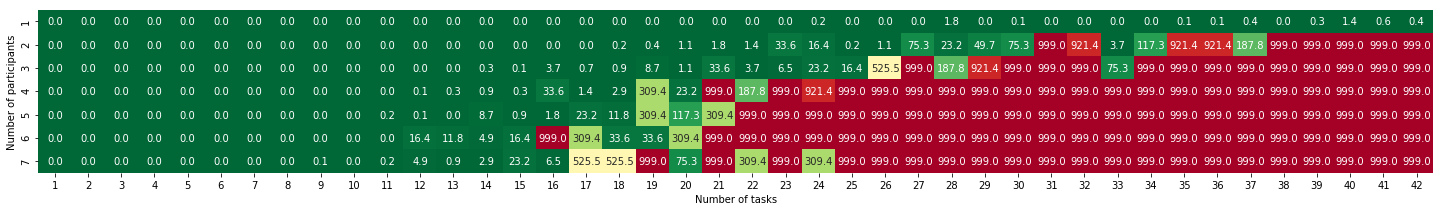

In [61]:
f, ax = plt.subplots(figsize=(25, 3))
sns.heatmap(resultsBayesLd[1:,1:], cmap="RdYlGn_r", vmin=0, vmax=1000, fmt=".1f", annot=True, cbar=False, ax=ax,
           xticklabels=range(1,43),yticklabels=range(1,8))
ax.set(xlabel='Number of tasks', ylabel='Number of participants')

In [29]:
(1-p_good)**(tot-gt)

array([3.72529030e-37, 2.09133944e-37, 1.15987157e-37, 6.35168816e-38,
       3.43257683e-38, 1.82955227e-38, 9.61139967e-39, 4.97336131e-39,
       2.53289898e-39, 1.26867283e-39, 6.24422980e-40, 3.01724507e-40,
       1.42994112e-40, 6.63956921e-41, 3.01699870e-41, 1.33992212e-41,
       5.80844922e-42, 2.45397014e-42, 1.00878196e-42, 4.02777325e-43,
       1.55888408e-43, 5.83572419e-44, 2.10792559e-44, 7.32695668e-45,
       2.44337499e-45, 7.79084651e-46, 2.36618823e-46, 6.81561333e-47,
       1.85272147e-47, 4.72617457e-48, 1.12401138e-48, 2.47343228e-49,
       4.99159889e-50, 9.14175115e-51, 1.50046246e-51, 2.17397667e-52,
       2.72950406e-53, 2.90231649e-54, 2.53901382e-55, 1.76063723e-56,
       9.21425326e-58, 3.40556769e-59, 8.09869421e-61, 1.08119715e-62,
       6.55888478e-65, 1.26867283e-67, 4.02777325e-71, 4.72617457e-76,
       1.76063723e-84, 0.00000000e+00])

# Scores comparison

In [13]:
dataScoreBeforeMerge = pd.read_csv("scoreList.csv", header=0)
dataScoreBeforeMerge.head()

,task,team,user,score
0,KIS Visual 1,vitrivr,vitrivr II,95
1,KIS Visual 1,siret,siret IV,95
2,KIS Visual 1,vitrivr,vitrivr VI,94
3,KIS Visual 1,vitrivr,vitrivr I,94
4,KIS Visual 1,vitrivr,vitrivr V,93


In [14]:
dataScore = pd.merge(data, dataScoreBeforeMerge, how='outer', on=['task', 'team', 'user'])
#dataScore = dataScoreMerged.fillna(0)
dataScore.head()

,task,team,user,correctItem_any,score
0,KIS Textual 1,siret,siret I,True,94.0
1,KIS Textual 11,siret,siret I,True,97.0
2,KIS Textual 12,siret,siret I,False,0.0
3,KIS Textual 13,siret,siret I,True,67.0
4,KIS Textual 15,siret,siret I,False,0.0


In [15]:
dataScore = dataScore.fillna(0)
dataScore.head()

,task,team,user,correctItem_any,score
0,KIS Textual 1,siret,siret I,True,94.0
1,KIS Textual 11,siret,siret I,True,97.0
2,KIS Textual 12,siret,siret I,False,0.0
3,KIS Textual 13,siret,siret I,True,67.0
4,KIS Textual 15,siret,siret I,False,0.0


In [16]:
dataScore.shape

(618, 5)

In [17]:
siret_dataScore = dataScore.loc[dataScore.team == "siret"]
vitrivr_dataScore = dataScore.loc[dataScore.team == "vitrivr"]
siret_usersScore = siret_dataScore.user.unique()
vitrivr_usersScore = vitrivr_dataScore.user.unique()
tasksScore = dataScore.task.unique()
siret_dataScore.shape

(282, 5)

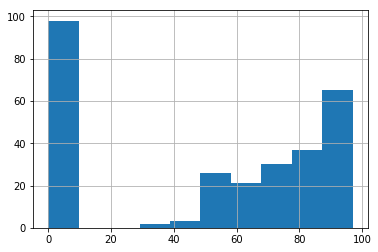

In [18]:
siret_dataScore.score.hist()

In [19]:
siret_dataScore.score.mean()

50.191489361702125

In [20]:
siret_dataScore.score.std()

38.75921011311268

In [21]:
(siret_dataScore.score.quantile(0.25),siret_dataScore.score.quantile(0.5),siret_dataScore.score.quantile(0.75))

(0.0, 64.0, 85.75)

In [22]:
vitrivr_dataScore.shape

(336, 5)

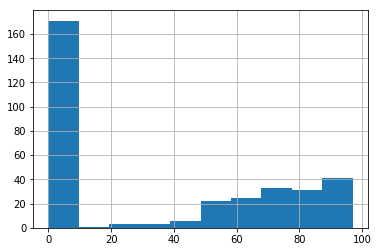

In [23]:
vitrivr_dataScore.score.hist()

In [24]:
vitrivr_dataScore.head()

,task,team,user,correctItem_any,score
282,KIS Textual 1,vitrivr,vitrivr I,True,0.0
283,KIS Textual 11,vitrivr,vitrivr I,True,96.0
284,KIS Textual 12,vitrivr,vitrivr I,True,29.0
285,KIS Textual 13,vitrivr,vitrivr I,False,0.0
286,KIS Textual 15,vitrivr,vitrivr I,False,0.0


In [25]:
v_to_merge = vitrivr_dataScore[["team","score"]]
s_to_merge = siret_dataScore[["team","score"]]

mergedScores = pd.concat([v_to_merge,s_to_merge])
mergedScores.head()

,team,score
282,vitrivr,0.0
283,vitrivr,96.0
284,vitrivr,29.0
285,vitrivr,0.0
286,vitrivr,0.0


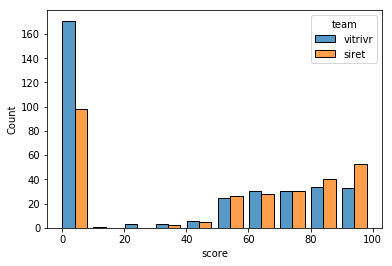

In [44]:
import seaborn
plot = seaborn.histplot(data=mergedScores, x="score", hue="team",multiple="dodge", bins=10, binrange=(0,100), shrink=.8)
plt.savefig("histogram_scores.png", dpi=300)

In [27]:
vitrivr_dataScore.score.mean()

35.69047619047619

In [32]:
vitrivr_dataScore.score.std()

38.330838273609984

In [31]:
(vitrivr_dataScore.score.quantile(0.25),vitrivr_dataScore.score.quantile(0.5),vitrivr_dataScore.score.quantile(0.75))

(0.0, 0.0, 73.25)

In [70]:
import scipy.stats
oddsvalue, pvalue = scipy.stats.ttest_ind(siret_dataScore.score, vitrivr_dataScore.score, equal_var=True)
pvalue

3.8682218270240136e-06